In [1]:
!pip install --upgrade numpy
!pip install --upgrade pandas
!pip install --upgrade matplotlib

Requirement already up-to-date: numpy in c:\programdata\anaconda3\lib\site-packages (1.18.5)
Requirement already up-to-date: pandas in c:\programdata\anaconda3\lib\site-packages (1.0.4)
Requirement already up-to-date: matplotlib in c:\programdata\anaconda3\lib\site-packages (3.2.1)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import preprocessing

In [97]:
path = "games_data/*"
files = glob.glob(path)
print(len(files), 'Files to load')

157 Files to load


In [2]:
import json
with open('features_list.json', 'r') as fp:
    features_list = json.load(fp)
features_list

{'0': 'team',
 '1': 'level',
 '2': 'health',
 '3': 'max health',
 '4': 'health regen',
 '5': 'mana',
 '6': 'max mana',
 '7': 'mana regen',
 '8': 'base move speed',
 '9': 'current move speed',
 '10': 'base damage',
 '11': 'damage variance',
 '12': 'attack damage',
 '13': 'attack range buffer',
 '14': 'attack speed',
 '15': 'seconds per attack',
 '16': 'attack animation point',
 '17': 'last attack time',
 '18': 'attack target',
 '19': 'strength',
 '20': 'agility',
 '21': 'intellect',
 '22': 'gold',
 '23': 'net worth',
 '24': 'last hits',
 '25': 'denies',
 '26': 'location 1',
 '27': 'location 2',
 '28': 'facing',
 '29': 'vision range',
 '30': 'opp team',
 '31': 'opp level',
 '32': 'opp health',
 '33': 'opp max health',
 '34': 'opp health regen',
 '35': 'opp mana',
 '36': 'opp max mana',
 '37': 'opp mana regen',
 '38': 'opp base move speed',
 '39': 'opp curr move speed',
 '40': 'opp base damage',
 '41': 'opp damage variance',
 '42': 'opp attack damage',
 '43': 'opp attack range buffer',
 '

In [3]:
df_state, df_action, df_next_state = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
df_raw_action = pd.DataFrame()
files = ['raw_data/testcol_1592227559.csv']
for f in files:
    df = pd.read_csv(f, index_col=0)
    # Create the inputs and outputs
    next_df = df.drop(columns=["action"])
    next_df.columns = features_list.values()
    next_df = next_df.drop(index=0, axis=0) # Drop first
    df_next_state = pd.concat([df_next_state, next_df], axis=0)
    
    actions = preprocessing.actions_to_vect(df['action'])
    actions = actions.drop(index=0, axis=0) # Drop first
    df_action = pd.concat([df_action, actions], axis=0)
    
    raw_action = df['action'].drop(index=0, axis=0)
    df_raw_action = pd.concat([df_raw_action, raw_action], axis=0)
    
    df = df.drop(index=len(df) - 1) # Drop last record (unknown output)
    df_state=pd.concat([df_state, df.drop(columns="action")], axis=0)    
    
    
    
    print('%s   \tImported: %d lines' % (f, len(df)), end='\n')

raw_data/testcol_1592227559.csv   	Imported: 15 lines


In [4]:
# Set column names
df_state.columns = ["state_" + i for i in list(features_list.values())]
df_next_state.columns = "next_" + df_state.columns.to_numpy()
df_action.columns = "action_" + df_action.columns.to_numpy()

# Reset index
for d in [df_state, df_action, df_next_state, df_raw_action]:
    d.reset_index(inplace=True, drop=True)
    print(d.shape)
    
df = pd.concat([df_state, df_action, df_next_state, df_raw_action], axis=1)

filter_new_games = df['state_dota time'] < df['next_state_dota time']
filter_loc_diff  = df['next_state_location 1'] - df['state_location 1'] > -4000
filter_dead = df['state_health'] > 0

df = df[filter_new_games & filter_loc_diff & filter_dead]

print(df.shape)
df.head()

(15, 310)
(15, 23)
(15, 310)
(15, 1)
(14, 644)


,state_team,state_level,state_health,state_max health,state_health regen,state_mana,state_max mana,state_mana regen,state_base move speed,state_current move speed,...,next_state_opp ability 5 behavior,next_state_opp ability 6 level,next_state_opp ability 6 mana cost,next_state_opp ability 6 ability damage,next_state_opp ability 6 cast range,next_state_opp ability 6 cooldown time remaining,next_state_opp ability 6 target type,next_state_opp ability 6 behavior,next_state_item flask,0
1,2,1,620,620,33.349998,315,315,20.199999,305,0,...,0,0,150,0,0,0,0,0,1,16.0
2,2,1,620,620,33.349998,315,315,20.199999,305,0,...,0,0,150,0,0,0,0,0,1,27.0
3,2,1,660,660,35.549999,339,339,21.740000,305,0,...,0,0,150,0,0,0,0,0,1,9.0
4,2,1,720,720,38.849998,375,375,24.049999,305,0,...,0,0,150,0,0,0,0,0,1,14.0
5,2,1,680,680,2.650000,351,351,1.450000,305,0,...,0,0,150,0,0,0,0,0,-1,29.0


In [101]:
df.to_csv("all_data.csv")

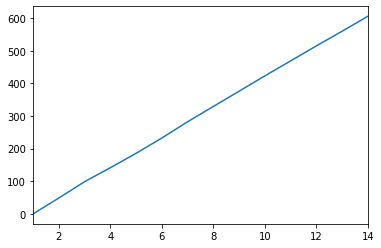

In [5]:
df['state_dota time'].plot()

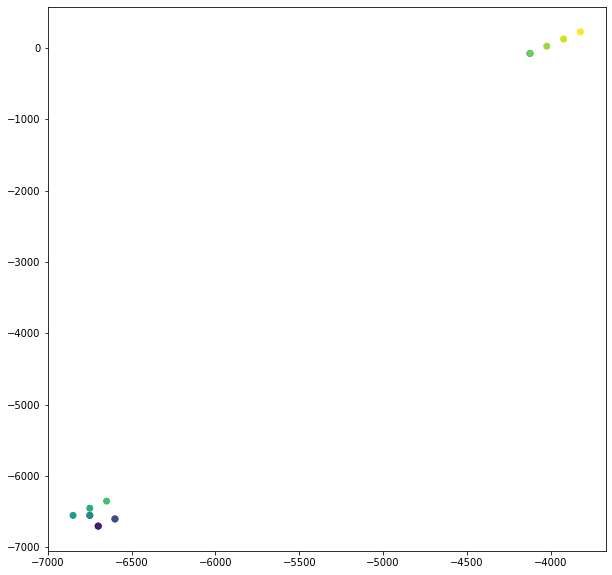

In [7]:
plt.figure(figsize = (10, 10))
plt.scatter(df["state_location 1"], df["state_location 2"], c=df['state_dota time'])

In [14]:
df[['state_location 1', 'state_location 1', 0]]

,state_location 1,state_location 1,0
1,-6700.000000,-6700.000000,16.0
2,-6700.000000,-6700.000000,27.0
3,-6600.000000,-6600.000000,9.0
4,-6600.000000,-6600.000000,14.0
5,-4123.101562,-4123.101562,29.0
6,-6750.000000,-6750.000000,6.0
7,-6750.000000,-6750.000000,19.0
8,-6850.000000,-6850.000000,16.0
9,-6750.000000,-6750.000000,9.0
10,-6650.000000,-6650.000000,21.0


In [8]:
path = "raw_data/*"
dirs = glob.glob(path)
print(len(files), 'Files to load\n', dirs)

5 Files to load
 ['raw_data\\games_data_0', 'raw_data\\games_data_1', 'raw_data\\games_data_2', 'raw_data\\games_data_3', 'raw_data\\games_data_4']


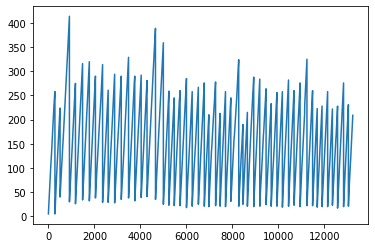

raw_data\games_data_0\rd_biggest.csv


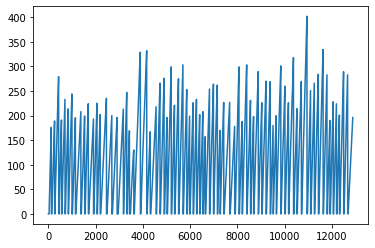

raw_data\games_data_1\rd_biggest.csv


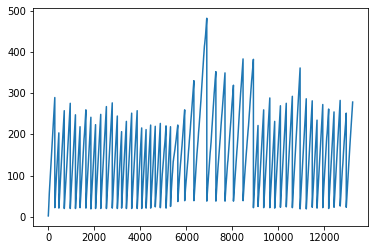

raw_data\games_data_2\rd_biggest.csv


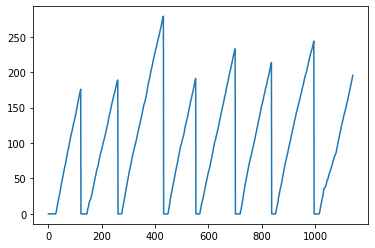

raw_data\games_data_3\rd_biggest.csv


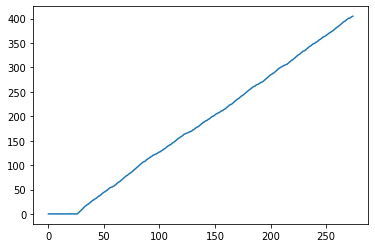

raw_data\games_data_4\rd_biggest.csv


In [27]:
for d in dirs:
    files = glob.glob(d+'\\rd_big*')
    df = pd.read_csv(files[0])
    plt.plot(df['56'])
    plt.show()
    print(files[0])

In [87]:
files = glob.glob('raw_data\\games_data_1\\rd_biggest_*') + glob.glob('raw_data\\games_data_3\\rd_biggest_*') + glob.glob('raw_data\games_data_4\*') 
files

['raw_data\\games_data_1\\rd_biggest_1.csv',
 'raw_data\\games_data_3\\rd_biggest_3.csv',
 'raw_data\\games_data_4\\rd_10138.csv',
 'raw_data\\games_data_4\\rd_10288.csv',
 'raw_data\\games_data_4\\rd_10718.csv',
 'raw_data\\games_data_4\\rd_1074.csv',
 'raw_data\\games_data_4\\rd_1156.csv',
 'raw_data\\games_data_4\\rd_12386.csv',
 'raw_data\\games_data_4\\rd_1323.csv',
 'raw_data\\games_data_4\\rd_13500.csv',
 'raw_data\\games_data_4\\rd_13988.csv',
 'raw_data\\games_data_4\\rd_1424.csv',
 'raw_data\\games_data_4\\rd_16004.csv',
 'raw_data\\games_data_4\\rd_162.csv',
 'raw_data\\games_data_4\\rd_16693.csv',
 'raw_data\\games_data_4\\rd_1692.csv',
 'raw_data\\games_data_4\\rd_1712.csv',
 'raw_data\\games_data_4\\rd_17201.csv',
 'raw_data\\games_data_4\\rd_17915.csv',
 'raw_data\\games_data_4\\rd_18134.csv',
 'raw_data\\games_data_4\\rd_18262.csv',
 'raw_data\\games_data_4\\rd_18904.csv',
 'raw_data\\games_data_4\\rd_19010.csv',
 'raw_data\\games_data_4\\rd_19293.csv',
 'raw_data\\game

In [78]:
for f in files

Double rd_20929.csv
Double rd_22901.csv
Double rd_47062.csv
Double rd_53391.csv
Double rd_54060.csv
Double rd_71041.csv
Double rd_87015.csv


['raw_data\\games_data_1\\rd_12065.csv',
 'raw_data\\games_data_1\\rd_12701.csv',
 'raw_data\\games_data_1\\rd_12755.csv',
 'raw_data\\games_data_1\\rd_13880.csv',
 'raw_data\\games_data_1\\rd_14668.csv',
 'raw_data\\games_data_1\\rd_14830.csv',
 'raw_data\\games_data_1\\rd_15669.csv',
 'raw_data\\games_data_1\\rd_16878.csv',
 'raw_data\\games_data_1\\rd_20929.csv',
 'raw_data\\games_data_1\\rd_22208.csv',
 'raw_data\\games_data_1\\rd_22901.csv',
 'raw_data\\games_data_1\\rd_23403.csv',
 'raw_data\\games_data_1\\rd_25292.csv',
 'raw_data\\games_data_1\\rd_25803.csv',
 'raw_data\\games_data_1\\rd_26915.csv',
 'raw_data\\games_data_1\\rd_28942.csv',
 'raw_data\\games_data_1\\rd_29780.csv',
 'raw_data\\games_data_1\\rd_30362.csv',
 'raw_data\\games_data_1\\rd_31898.csv',
 'raw_data\\games_data_1\\rd_32245.csv',
 'raw_data\\games_data_1\\rd_33081.csv',
 'raw_data\\games_data_1\\rd_33238.csv',
 'raw_data\\games_data_1\\rd_34562.csv',
 'raw_data\\games_data_1\\rd_34676.csv',
 'raw_data\\game

In [70]:
df = pd.read_csv("raw_data\\games_data_0\\rd_biggest_0.csv", index_col=0)
df['56'].describe()

count    13235.000000
mean       153.573702
std         78.466072
min          4.833329
25%         88.682262
50%        150.137329
75%        211.767159
max        413.852844
Name: 56, dtype: float64

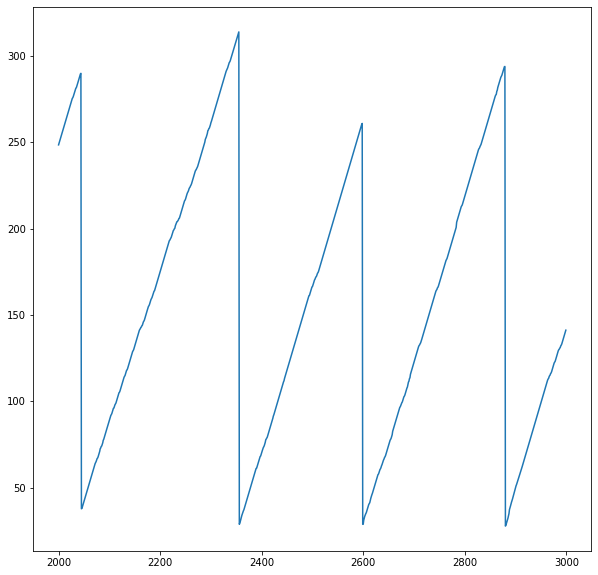

In [76]:
plt.figure(figsize=(10, 10))
plt.plot(df['56'][2000:3000])

In [2]:
df = pd.read_csv("raw_data/testcol_1592227559.csv", index_col=0)

In [12]:
df.columns = list(features_list.values()) + ["action"]
df.columns

Index(['team', 'level', 'health', 'max health', 'health regen', 'mana',
       'max mana', 'mana regen', 'base move speed', 'current move speed',
       ...
       'opp ability 5 behavior', 'opp ability 6 level',
       'opp ability 6 mana cost', 'opp ability 6 ability damage',
       'opp ability 6 cast range', 'opp ability 6 cooldown time remaining',
       'opp ability 6 target type', 'opp ability 6 behavior', 'item flask',
       'action'],
      dtype='object', length=311)

In [6]:
plt.figure(figsize = (10, 10))
plt.scatter(df["location 1"], df["location 2"], c=df['dota time'])

KeyError: 'location 1'

<Figure size 720x720 with 0 Axes>

In [20]:
df["action"]

0      0
1     25
2     16
3     27
4      9
5     14
6     29
7      6
8     19
9     16
10     9
11    21
12     1
13    17
14    15
15    14
Name: action, dtype: int64

In [30]:
pd.read_csv('raw_data/15-06-2020-15-57-25.csv')['action']

0       3
1       3
2      10
3      10
4      10
5      10
6      10
7      10
8      10
9      21
10     21
11     21
12      3
13      3
14      3
15      3
16      3
17      3
18      3
19      3
20      3
21      3
22      3
23     21
24     21
25     21
26     21
27     21
28     10
29     10
       ..
77     10
78     10
79     10
80     10
81     10
82     10
83     10
84     10
85     10
86     10
87     10
88     10
89     10
90     10
91     10
92     10
93     10
94     10
95     10
96     10
97     10
98     10
99     10
100    10
101    10
102    10
103    10
104    10
105    10
106    10
Name: action, Length: 107, dtype: int64